In [1]:
import geopandas as gpd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import folium

Task 1 - Cek data null

In [2]:
gdf = gpd.read_file(r"D:\Alia - Geografi\Courses\MAPID Academy WebGIS Development\Tugas 4\demografi_kota_surabaya.geojson")   #Membaca file menggunakan geopandas
display(gdf.head())  #Menampilkan 5 baris data teratas

fid ID_PROV    PROVINSI ID_KABKOT         KABKOT    ID_KEC  KECAMATAN  \
0  81107      35  JAWA TIMUR     35.78  KOTA SURABAYA  35.78.19     BENOWO   
1  80983      35  JAWA TIMUR     35.78  KOTA SURABAYA  35.78.05  TEGALSARI   
2  80982      35  JAWA TIMUR     35.78  KOTA SURABAYA  35.78.03    RUNGKUT   
3  80966      35  JAWA TIMUR     35.78  KOTA SURABAYA  35.78.16   SEMAMPIR   
4  80961      35  JAWA TIMUR     35.78  KOTA SURABAYA  35.78.04  WONOKROMO   

         ID_DESA          DESA  JUMLAH PENDUDUK  ...  MENGURUS RUMAH TANGGA  \
0  35.78.19.1005  ROMOKALISARI             3299  ...                    530   
1  35.78.05.1005      WONOREJO            26156  ...                   5040   
2  35.78.03.1005      WONOREJO            20255  ...                   2735   
3  35.78.16.1003    WONOKUSUMO            68777  ...                  13898   
4  35.78.04.1001     WONOKROMO            39613  ...                   5925   

   PERDAGANGAN  PERAWAT  NELAYAN  PELAJAR DAN MAHASISWA  GURU  WIRASWASTA  \
0            9        2        1                    573    30         159   
1           52       10        0                   6481   117         860   
2           15       30        5                   5103   174        1212   
3           29       36        1                  13991   335        4155   
4           37       39        3                   8808   415        2282   

   PENGACARA  PEKERJAAN LAINNYA  \
0          0                  0   
1          2                  0   
2          3                  0   
3          2                  0   
4          1                  0   

                                            geometry  
0  MULTIPOLYGON Z (((112.65612 -7.19378 0, 112.65...  
1  MULTIPOLYGON Z (((112.73505 -7.26808 0, 112.73...  
2  MULTIPOLYGON Z (((112.84346 -7.30556 0, 112.84...  
3  MULTIPOLYGON Z (((112.76093 -7.21297 0, 112.76...  
4  MULTIPOLYGON Z (((112.73743 -7.29975 0, 112.73...  

[5 rows x 103 columns]

In [4]:
null_data = gdf.isnull().sum()    #Menjumlahkan data null yang ada pada setiap kolom
print(null_data.head(50))      #Mencetak jumlah data null

fid                               0
ID_PROV                           0
PROVINSI                          0
ID_KABKOT                         0
KABKOT                            0
ID_KEC                            0
KECAMATAN                         0
ID_DESA                           0
DESA                              0
JUMLAH PENDUDUK                   0
JUMLAH KK                         0
LUAS WILAYAH (KM2)                0
KEPADATAN PENDUDUK                0
PERPINDAHAN PENDUDUK              0
JUMLAH MENINGGAL                  0
PERUBAHAN DATA                    0
JUMLAH WAJIB KTP                  0
JUMLAH REKAM WAJIB KTP            0
ISLAM                             0
KRISTEN                           0
KATHOLIK                          0
HINDU                             0
BUDDHA                            0
KONGHUCU                          0
KEPERCAYAAN TERHADAP TUHAN YME    0
LAKI-LAKI                         0
PEREMPUAN                         0
BELUM KAWIN                 

Task 2 - Analisis Statistik Dasar

In [5]:
#Menampilkan statistik deskriptif dari kolom tertentu
gdf[['JUMLAH PENDUDUK', 'KEPADATAN PENDUDUK', 'JUMLAH KK', 'JUMLAH WAJIB KTP']].describe()

JUMLAH PENDUDUK  KEPADATAN PENDUDUK     JUMLAH KK  JUMLAH WAJIB KTP
count       154.000000          154.000000    154.000000        154.000000
mean      19347.266234           57.594005   6436.785714      14445.435065
std       11772.577708           35.045256   3790.130684       8597.101428
min           0.000000            0.000000      0.000000          0.000000
25%       11872.500000           35.342710   3903.750000       8851.750000
50%       15991.000000           47.602888   5443.500000      12176.500000
75%       23063.000000           68.655206   7771.500000      17408.750000
max       68777.000000          204.739153  21647.000000      48684.000000

In [39]:
#Menampilkan data 3 KECAMATAN dengan populasi tertinggi
top_3_populasi_kecamatan = gdf.groupby('KECAMATAN')['JUMLAH PENDUDUK'] \
                            .sum() \
                            .reset_index(name='JUMLAH PENDUDUK')

top_3_populasi_kecamatan = top_3_populasi_kecamatan.sort_values(by='JUMLAH PENDUDUK', ascending=False).head(3)
print(top_3_populasi_kecamatan[['KECAMATAN', 'JUMLAH PENDUDUK']])

     KECAMATAN  JUMLAH PENDUDUK
24  TAMBAKSARI           227025
19     SAWAHAN           198516
11    KENJERAN           185294


In [38]:
#Menampilkan data 3 KECAMATAN dengan populasi terendah
top_3_populasi_kecamatan = gdf.groupby('KECAMATAN')['JUMLAH PENDUDUK'] \
                            .sum() \
                            .reset_index(name='JUMLAH PENDUDUK')

top_3_populasi_kecamatan = top_3_populasi_kecamatan.sort_values(by='JUMLAH PENDUDUK', ascending=True).head(3)
print(top_3_populasi_kecamatan[['KECAMATAN', 'JUMLAH PENDUDUK']])

         KECAMATAN  JUMLAH PENDUDUK
15  PABEAN CANTIAN            35388
5         GAYUNGAN            43846
3            BULAK            47839


In [40]:
#Menampilkan data 3 DESA dengan kepadatan tertinggi
top_3_kepadatan_desa = gdf.sort_values(by='KEPADATAN PENDUDUK', ascending=False).head(3)
print(top_3_kepadatan_desa[['DESA', 'KECAMATAN', 'KEPADATAN PENDUDUK', 'LUAS WILAYAH (KM2)']])

                    DESA KECAMATAN  KEPADATAN PENDUDUK  LUAS WILAYAH (KM2)
3             WONOKUSUMO  SEMAMPIR          204.739153            1.407400
29        SIDOTOPO WETAN  KENJERAN          187.881223            1.816670
13  TANAH KALI KEDINDING  KENJERAN          186.571407            2.712409


In [34]:
#Menampilkan data 3 DESA dengan kepadatan terendah
top_3_bawah_kepadatan_desa = gdf.sort_values(by='KEPADATAN PENDUDUK', ascending=True).head(3)
print(top_3_bawah_kepadatan_desa[['DESA', 'KECAMATAN', 'KEPADATAN PENDUDUK', 'LUAS WILAYAH (KM2)']])

            DESA       KECAMATAN  KEPADATAN PENDUDUK  LUAS WILAYAH (KM2)
49   PERAK TIMUR  PABEAN CANTIAN            0.000000            0.440986
48   PERAK UTARA  PABEAN CANTIAN            0.000000            3.260603
0   ROMOKALISARI          BENOWO            9.820644            8.212457


Task 3 - Analisis Geometri

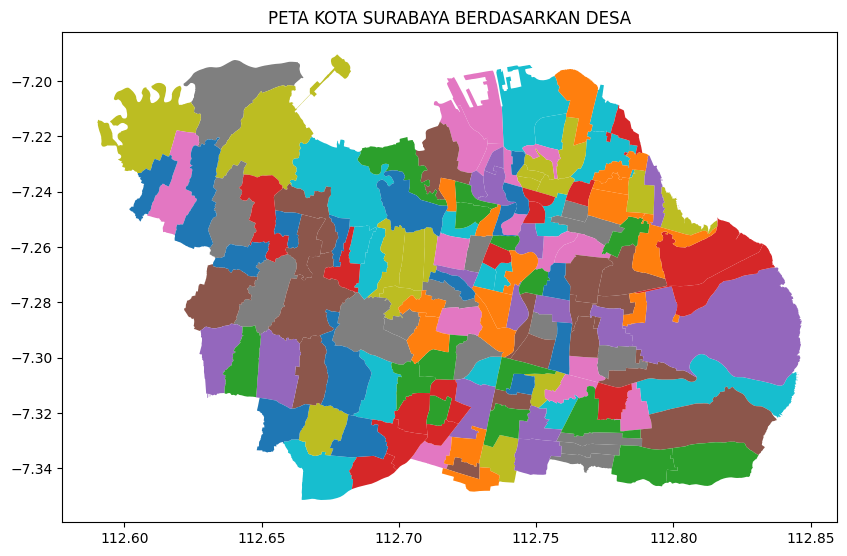

In [8]:
gdf.plot(figsize=(10,10), column='DESA')   #Membuat peta dasar dengan pewarnaan berdasarkan kolom tertentu
plt.title('PETA KOTA SURABAYA BERDASARKAN DESA')   #Memberikan judul pada peta
plt.show()   #Menampilkan peta

In [9]:
gdf['centroid'] = gdf.geometry.centroid   #Menghitung centroid dari setiap geometri
print(gdf[['DESA', 'centroid']].head(15))

                    DESA                    centroid
0           ROMOKALISARI   POINT (112.6398 -7.20502)
1               WONOREJO  POINT (112.73174 -7.27113)
2               WONOREJO   POINT (112.8148 -7.31131)
3             WONOKUSUMO  POINT (112.75525 -7.21828)
4              WONOKROMO  POINT (112.73161 -7.30513)
5                 WIYUNG  POINT (112.69289 -7.31187)
6            WARU GUNUNG  POINT (112.67184 -7.34157)
7                  UJUNG  POINT (112.74691 -7.20942)
8       TENGGILIS MEJOYO  POINT (112.75812 -7.31994)
9           TEMBOK DUKUH  POINT (112.72105 -7.25281)
10             TEGALSARI  POINT (112.73762 -7.27075)
11           TANJUNGSARI  POINT (112.69039 -7.26668)
12                TANDES  POINT (112.68594 -7.25899)
13  TANAH KALI KEDINDING  POINT (112.77432 -7.22677)
14            TAMBAKSARI  POINT (112.75516 -7.25336)


C:\Users\user\AppData\Local\Temp\ipykernel_13424\833775524.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.geometry.centroid   #Menghitung centroid dari setiap geometri


Task 4 - Analisis Korelasi Variabel Demografi

In [10]:
#Analisis korelasi antar variabel/antar kolom data
correlation = gdf[['JUMLAH PENDUDUK', 'KEPADATAN PENDUDUK', 'JUMLAH KK', 'JUMLAH WAJIB KTP', 'PENSIUN']].corr()
print(correlation)

                    JUMLAH PENDUDUK  KEPADATAN PENDUDUK  JUMLAH KK  \
JUMLAH PENDUDUK            1.000000            1.000000   0.996675   
KEPADATAN PENDUDUK         1.000000            1.000000   0.996675   
JUMLAH KK                  0.996675            0.996675   1.000000   
JUMLAH WAJIB KTP           0.998573            0.998573   0.998958   
PENSIUN                    0.524224            0.524224   0.538205   

                    JUMLAH WAJIB KTP   PENSIUN  
JUMLAH PENDUDUK             0.998573  0.524224  
KEPADATAN PENDUDUK          0.998573  0.524224  
JUMLAH KK                   0.998958  0.538205  
JUMLAH WAJIB KTP            1.000000  0.542039  
PENSIUN                     0.542039  1.000000  


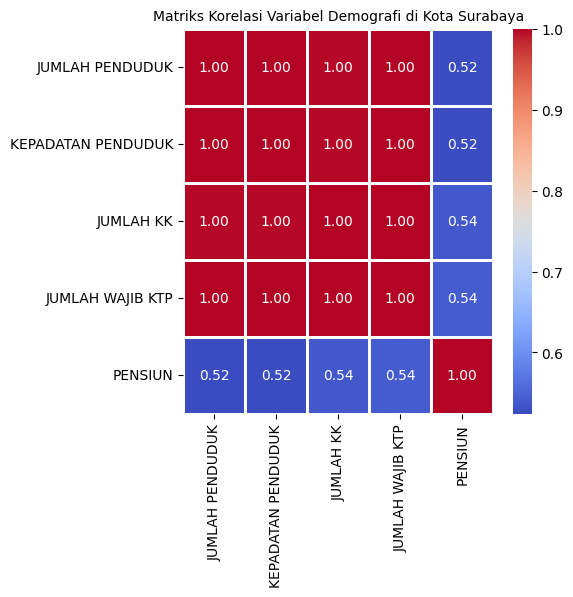

In [11]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Matriks Korelasi Variabel Demografi di Kota Surabaya', fontsize=10)
plt.show()

Task 5 - Distribusi Spasial Kepadatan Penduduk

In [28]:
#Memanggil data geojson
gdf = gpd.read_file(r"D:\Alia - Geografi\Courses\MAPID Academy WebGIS Development\Tugas 4\demografi_kota_surabaya.geojson")

#Membuat peta centroid
map_center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]
mymap = folium.Map(location=map_center, zoom_start=11)

#Menambahkan peta chloropleth
folium.Choropleth(
    geo_data=gdf.to_json(), #Data GeoJSON
    name='Choropleth Kepadatan Penduduk', #Nama Layer Choropleth
    data=gdf, #Data yang digunakan untuk coloring
    columns=['DESA', 'KEPADATAN PENDUDUK'], #Kolom yang digunakan
    key_on='feature.properties.DESA', #Key pada GeoJSON yang digunakan untuk menghubungkan data
    fill_color='viridis', #Skema warna
    fill_opacity=0.7, #Opasitas warna isi
    line_opacity=0.2, #Opasitas garis batas
    legend_name='Kepadatan Penduduk (jiwa/km2)' #Nama legenda
).add_to(mymap)

mymap

C:\Users\user\AppData\Local\Temp\ipykernel_13424\2578314877.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]


Task 6 - Peta Tematik Interaktif

In [41]:
#Membuat peta centroid
map_center2 = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]
mymap2 = folium.Map(location=map_center2, zoom_start=11)

#Menambahkan peta chloropleth
folium.Choropleth(
    geo_data=gdf.to_json(), #Data GeoJSON
    name='Choropleth Kepadatan Penduduk', #Nama Layer Choropleth
    data=gdf, #Data yang digunakan untuk coloring
    columns=['KECAMATAN', 'JUMLAH PENDUDUK'], #Kolom yang digunakan
    key_on='feature.properties.DESA', #Key pada GeoJSON yang digunakan untuk menghubungkan data
    fill_color='magma', #Skema warna
    fill_opacity=0.7, #Opasitas warna isi
    line_opacity=0.2, #Opasitas garis batas
    legend_name='Jumlah Penduduk (jiwa)' #Nama legenda
).add_to(mymap2)

#Menambahkan pop up informasi
folium.GeoJson(
    gdf,
    popup=folium.GeoJsonPopup(fields=['KECAMATAN', 'DESA', 'JUMLAH PENDUDUK', 'LUAS WILAYAH (KM2)']), labels=True, localize=True)

style_function=lambda feature: {
    'color':'black',
    'weight':2,
    'fillOpacity':0
    }.add_to(mymap2)

mymap2

C:\Users\user\AppData\Local\Temp\ipykernel_13424\3160833950.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_center2 = [gdf.geometry.centroid.y.mean(), gdf.geometry.centroid.x.mean()]


Summary
1. 3 kecamatan dengan jumlah penduduk tertinggi: Tambaksari, Sawahan, Kenjeran
2. 3 kecamatan dengan jumlah penduduk terendah: Pabean Cantian, Gayungan, Bulak
3. 3 desa dengan jumlah kepadatan penduduk tertinggi: Wonokusumo, Sidotopo Wetan, Tanah Kali Kedinding
4. 3 desa dengan jumlah kepadatan penduduk terendah: Perak Timur, Perak Utara, Romokalisari
5. Insight korelasi antarvariabel demorafi: Data JUMLAH PENDUDUK, KEPADATAN PENDUDUK, JUMLAH KK, dan JUMLAH WAJIB KTP memiliki korelasi yang tinggi satu sama lain, yaitu pada rentang 0,9 - 1. Keempat data ini memiliki pola identik, yaitu ketika satu meningkat, yang lain juga meningkat dan ketika satu turun, yang lain juga menurun. Lalu, untuk data PENSIUN memiliki nilai korelasi menengah (0,5). Hal ini menunjukkan bahwa terdapat hubungan antara variabel PENSIUN dengan variabel lainnya, tetapi hubungannya tidak terlalu kuat dan tidak selalu berbanding lurus.